<h3>In this project, we will predict the future price of avocado using Facebook prophet.
Prophet is an open source tool used for times series forecasting.


In [48]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import random
# import seaborn as sns
from fbprophet import Prophet
import os
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns


Importing plotly failed. Interactive plots will not work.


In [6]:
data=pd.read_csv(r"C:\Users\Tuan Nguyen\avocado.csv")

In [7]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
data.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<h3>Explore Data

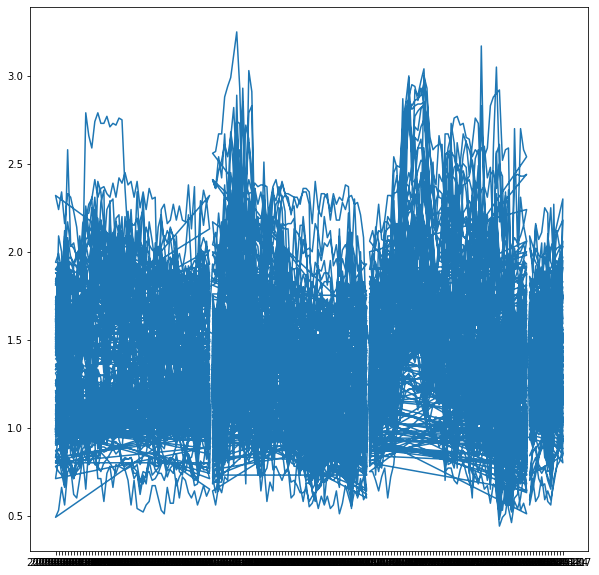

In [14]:
plt.figure(figsize=(10,10))
plt.plot(data['Date'],data['AveragePrice'])

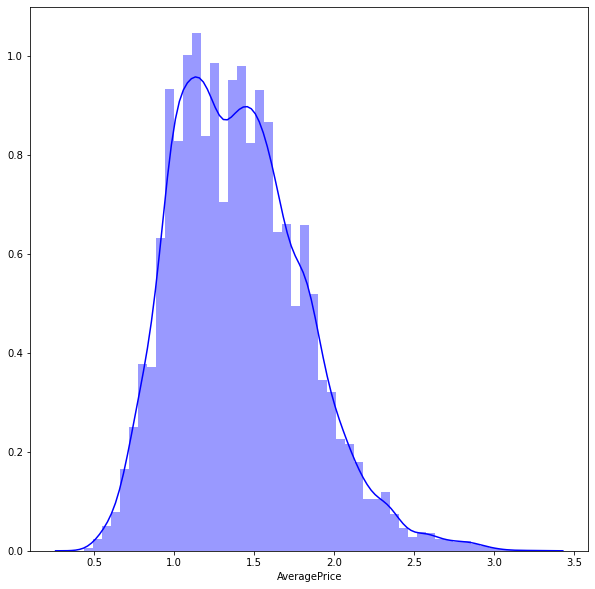

In [15]:
#plot distribution of the average price
plt.figure(figsize=(10,10))
sns.distplot(data['AveragePrice'],color='b')

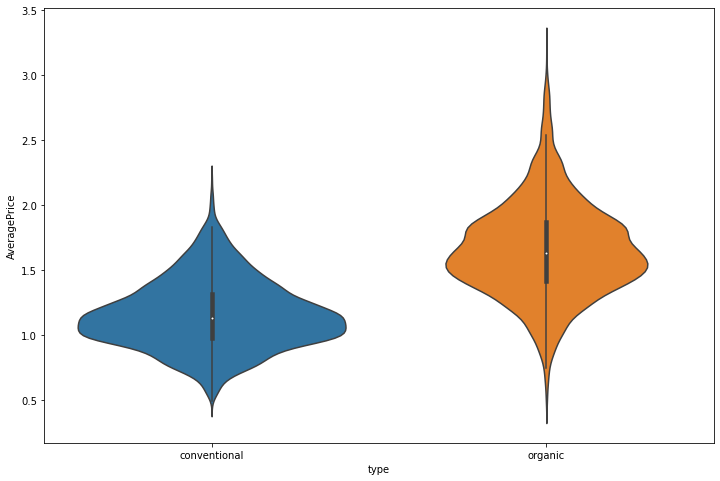

In [16]:
#plot a violin plot of the average price and avocado type
sns.violinplot(y='AveragePrice',x='type',data=data)


The average price of organic avocado is higher than the conventional one.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

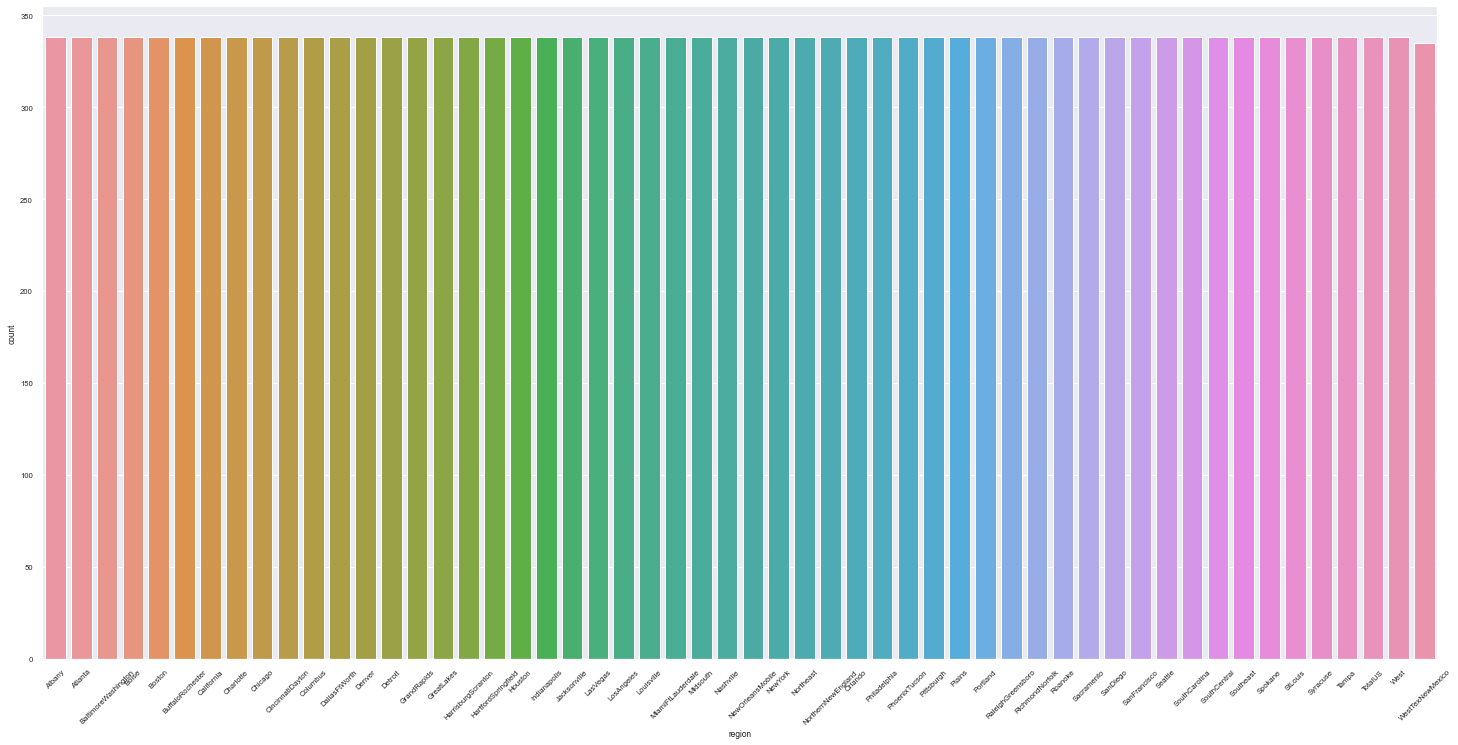

In [17]:
#bar chart to indicate the number of regions

sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

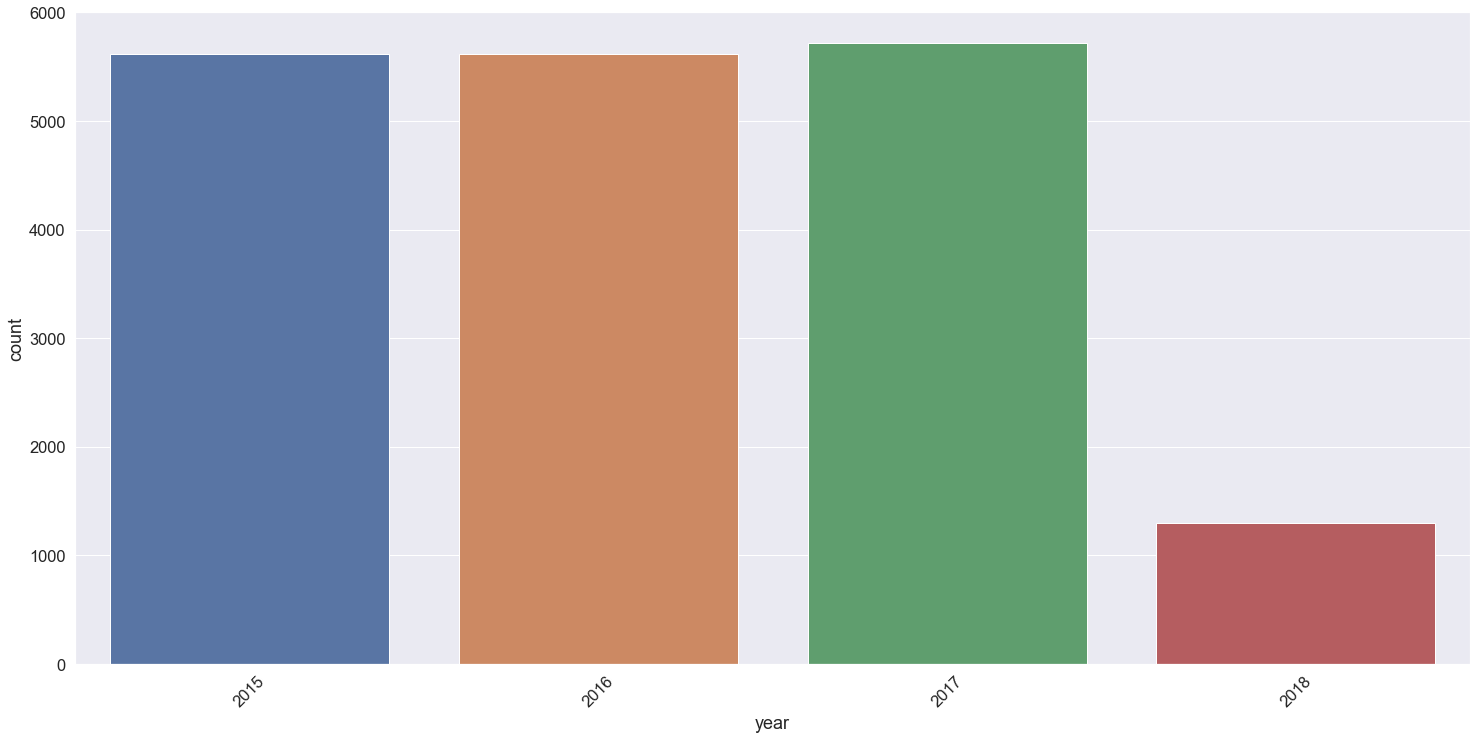

In [19]:
#bar chart to indicate the count in every year
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x='year',data=data)
plt.xticks(rotation=45)

C:\Users\Tuan Nguyen\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Tuan Nguyen\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


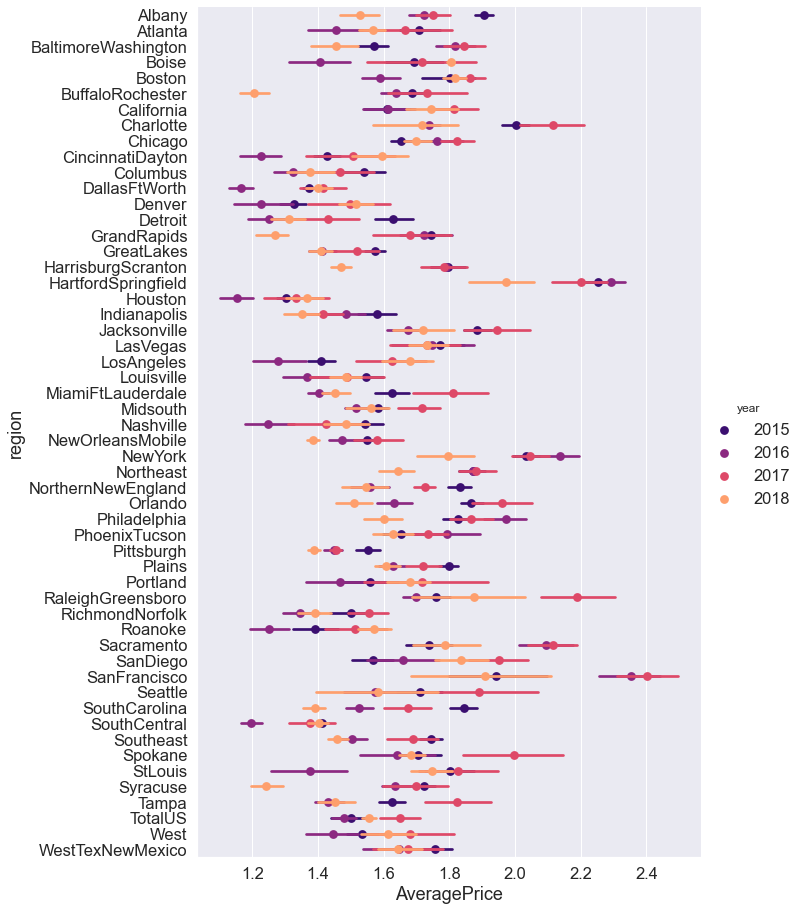

In [46]:
# #plot the avocado prices vs regions for conventional avocados
# plt.figure(figsize=(50,50))
# conventional= sns.catplot('AveragePrice','region',data=data[data['type']=='conventional'],aspect=5)
# hue='year'

mask = data['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )


Summary: In San Francisco 2017, the average price of organic avocado is the most expensive; while searching in Google about it, we can get a result. As in 2017, there was a shortage of avocados and it can explain this question.

In [39]:
dataNew=data[['Date','AveragePrice']]

In [40]:
dataNew

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [41]:
dataNew=dataNew.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [45]:
dataNew.head(5)

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


<h3> Develop model and make prediction 

In [49]:
m=Prophet()
m.fit(dataNew)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future=m.make_future_dataframe(periods=365)
forecast= m.predict(future)

In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500084,0.882570,1.872676,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
1,2015-01-04,1.500084,0.905274,1.893081,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
2,2015-01-04,1.500084,0.886086,1.900278,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
3,2015-01-04,1.500084,0.903846,1.900334,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
4,2015-01-04,1.500084,0.899281,1.868433,1.500084,1.500084,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,-0.114636,0.0,0.0,0.0,1.385448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.173476,0.556889,1.597786,0.999605,1.356211,-0.087423,-0.087423,-0.087423,-0.087423,-0.087423,-0.087423,0.0,0.0,0.0,1.086052
18610,2019-03-22,1.172768,0.588333,1.615334,0.998452,1.356527,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,-0.085713,0.0,0.0,0.0,1.087055
18611,2019-03-23,1.172061,0.560920,1.617634,0.997935,1.356808,-0.083727,-0.083727,-0.083727,-0.083727,-0.083727,-0.083727,0.0,0.0,0.0,1.088334
18612,2019-03-24,1.171354,0.592933,1.632957,0.997416,1.357089,-0.081484,-0.081484,-0.081484,-0.081484,-0.081484,-0.081484,0.0,0.0,0.0,1.089870


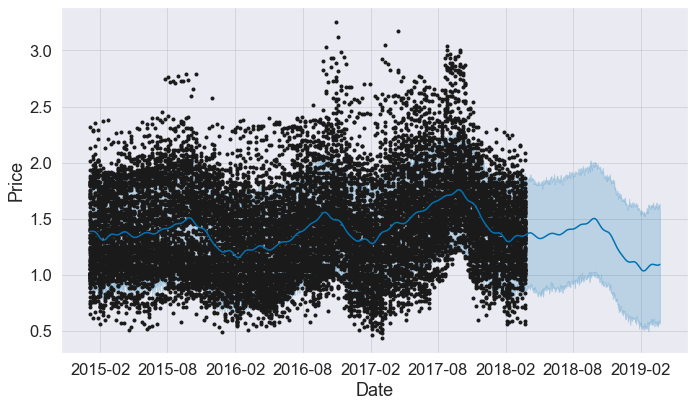

In [53]:
figure=m.plot(forecast, xlabel='Date',ylabel='Price')

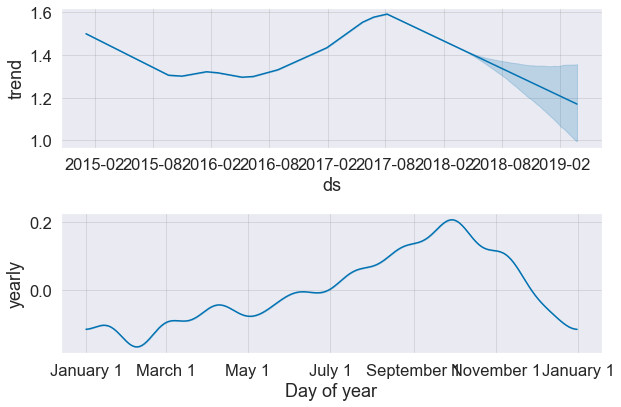

In [54]:
figure2=m.plot_components(forecast)

 Base on the trend chart, we can see that the price will decrease until beginning of 2019, which is lower than 1.2$.
 In the yearly chart, the price fluctuated from January 2018 to November2018 and reach a peak in November with more than 0.2 and then start to decrease afer November 2018 to January 2019.

<h3> Developing forecasting and make prediction , base on region

In [55]:
df=pd.read_csv(r"C:\Users\Tuan Nguyen\avocado.csv")

In [71]:
df_sample=df[df['region']=='West']

In [72]:
df_sample=df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


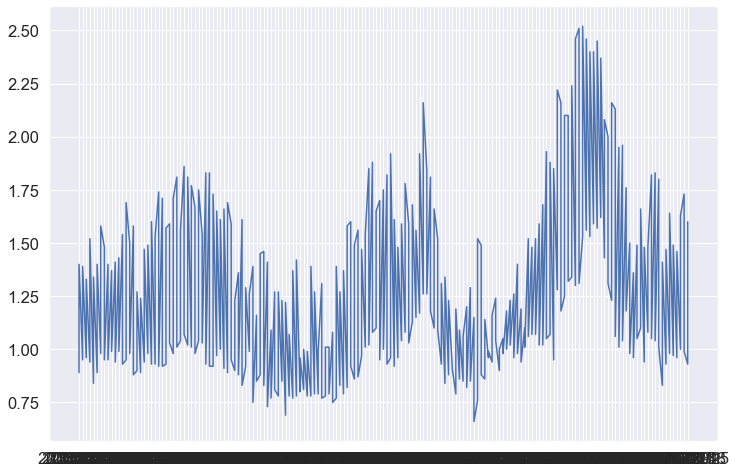

In [73]:
plt.plot(df_sample['Date'],df_sample['AveragePrice'])

In [74]:
df_sample=df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [75]:
m=Prophet()
m.fit(df_sample)
#forecasting into the future
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


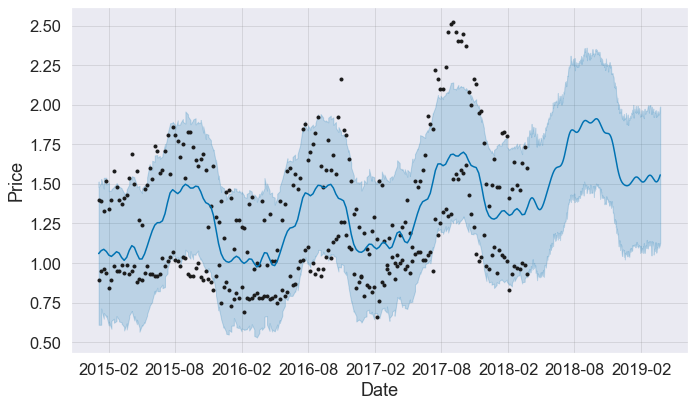

In [76]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

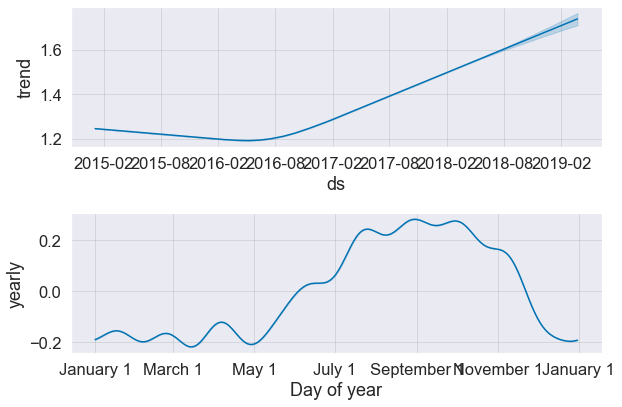

In [77]:
figure3=m.plot_components(forecast)

Conclusion, in West region, the trend price is predicted to  increase more than 1.6$ until 02/2019 in trend; while in yearly, the price is predicted to decline until January and could be increase after that.

<h1> End of Project